A random walk can help to understand the predictability of time series forecast problem.

### Random Series

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from random import seed
from random import randrange
from matplotlib import pyplot

A random **seed** (or seed state, or just seed) is a number (or vector) used to initialize a pseudorandom number generator.

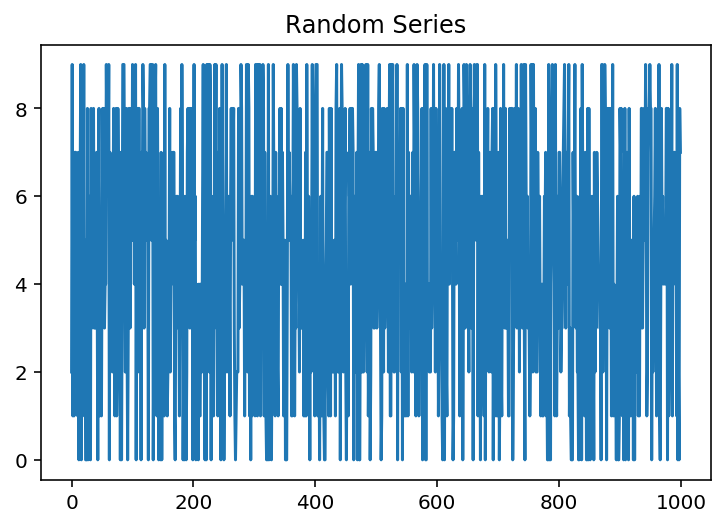

In [6]:
seed(1)
series = [randrange(10) for i in range(1000)]
pyplot.plot(series)
pyplot.title('Random Series')
pyplot.show()

This is not a random walk. It is just a sequence of random numbers.

### Random Walk

A random walk is different from a list of random numbers becasue the next value in the sequence is a modification of the previous value in the sequence.

The process used to generate the series forces dependence from one-time step to the next. This dependence provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides.

[White Noise](https://machinelearningmastery.com/white-noise-time-series-python/)

$ y(t) = B_0 + B_1*X(t-1) + e(t) $

$y(t)$ is the next value in the series. 

$B_0$ is a coefficient that if set to a value other than zero adds a constant drift to the random walk.

$B_1$ is a coefficient to weight the previous time step.

$X(t-1)$ is the observation at the previous time step.

$e(t)$ is the white noise or random fluctuation.

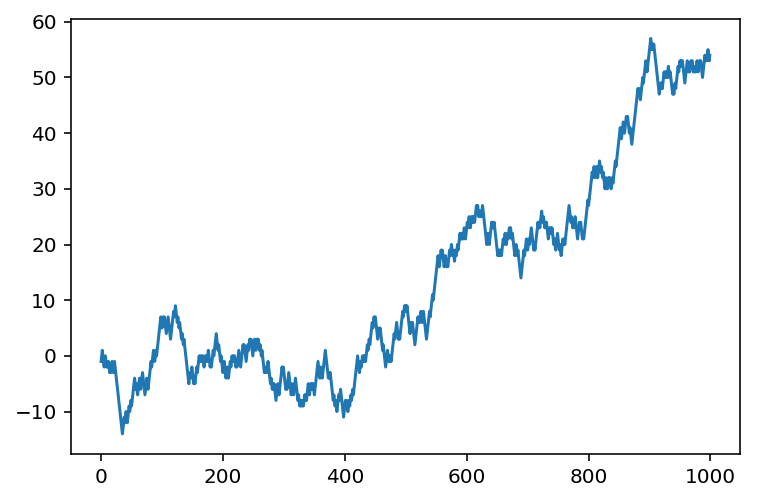

In [10]:
from random import random
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

### Random Walk and Autocorrelation

We can calculate the correlation between each observation and the observations at previous time steps.

In [11]:
from pandas.plotting import autocorrelation_plot

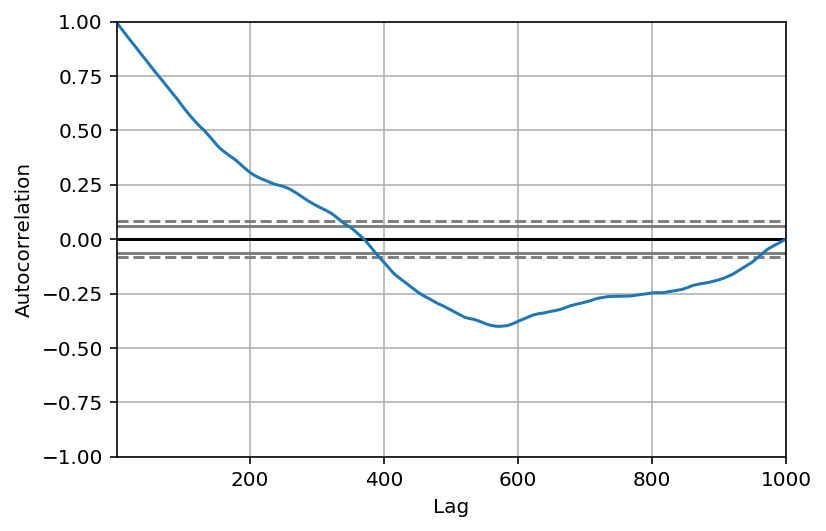

In [12]:
autocorrelation_plot(random_walk)

### Random Walk and Stationarity

The current observation is a random step from the previous observation.

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


We can make the random walk stationary by taking the first difference. This is replacing each observation as the difference between it and the previous value.

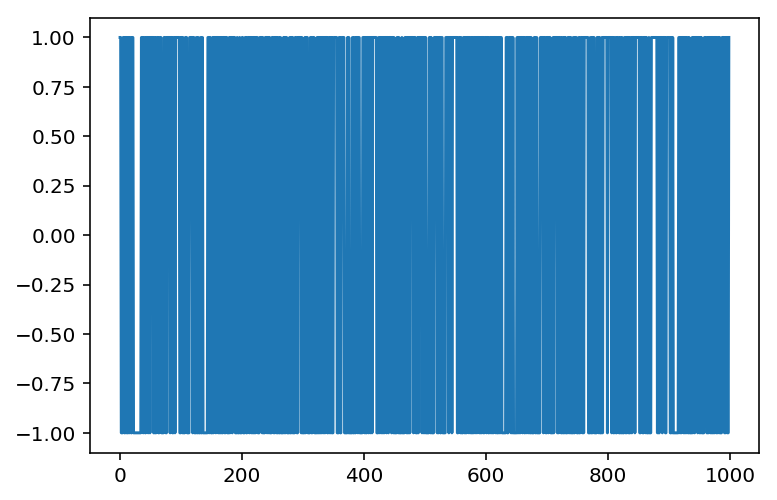

In [17]:
diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i-1]
    diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

Calculate the correlogram of the differenced series.

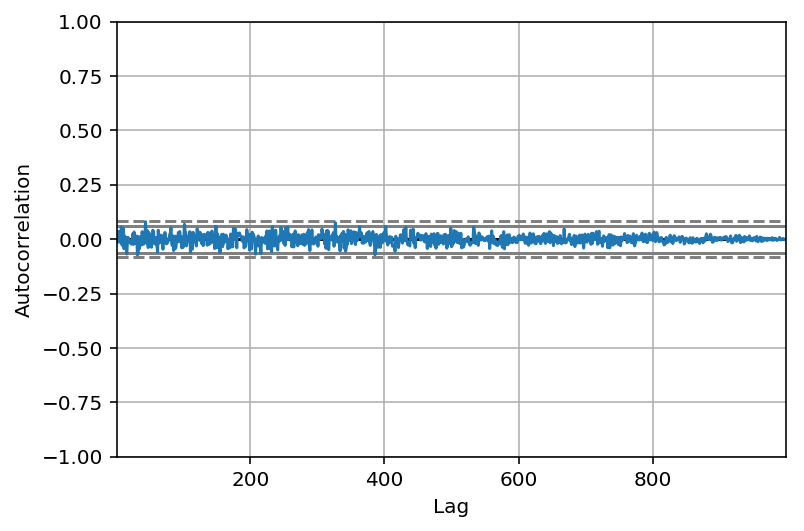

In [18]:
autocorrelation_plot(diff)
pyplot.show()

### Predict a random walk

In [24]:
from sklearn.metrics import mean_squared_error
# prepare dataset
train_size = int(len(random_walk)*0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

# Random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history + (-1 if random() < 0.5 else 1)
    predictions.append(yhat)
    history = test[i]
error = mean_squared_error(test, predictions)
print('Random MSE: %.3f' % error)

Random MSE: 1.765


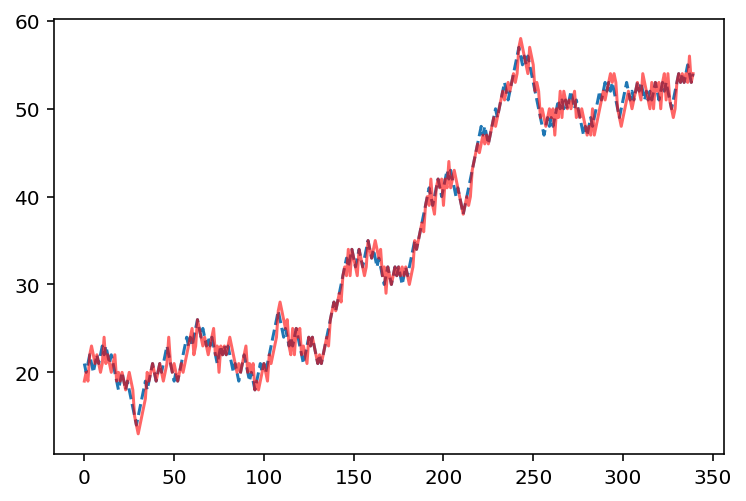

In [26]:
pyplot.plot(test, label='held-out data', linestyle='--')
pyplot.plot(predictions,'r', alpha=.6, label='Predicted values')
pyplot.show()